# Imports, Preprocessing, and Training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Use this command if running notebooks on Jupyter, or locally.
df = pd.read_csv("../data/wind_old.csv")
# Run this command when running the notebooks on Google Colab.
# df = pd.read_csv('https://raw.githubusercontent.com/AidanNeeson/renewable-ml/main/data/wind_old.csv')

df = df.sample(frac=1)

X = df.loc[:, [False, True, True, True, False, True, True, False, False]]
y = df.loc[:, [False, False, False, False, False,False, False, True, True]]

X_train = X[:100000]
X_test = X[100000:]
y_train = y[:100000]
y_test = y[100000:]

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = RandomForestRegressor(random_state=0)
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

## Graphs/Metrics

### Feature Importances

In [2]:
#| label: feature-importances-old-wind
features = ['lat','long','wind_speed','capacity','capacity_factor']
importances = reg.feature_importances_
indices = np.argsort(importances)

print("Feature Importances")
print('----------------------------')
for i in indices:
    print(f"{features[i]}: {importances[i]*100}")

Feature Importances
----------------------------
lat: 1.7415146179729832e-09
long: 4.556724073707158e-09
wind_speed: 2.5874951940190983e-08
capacity_factor: 0.0005676720796435423
capacity: 99.99943229574717


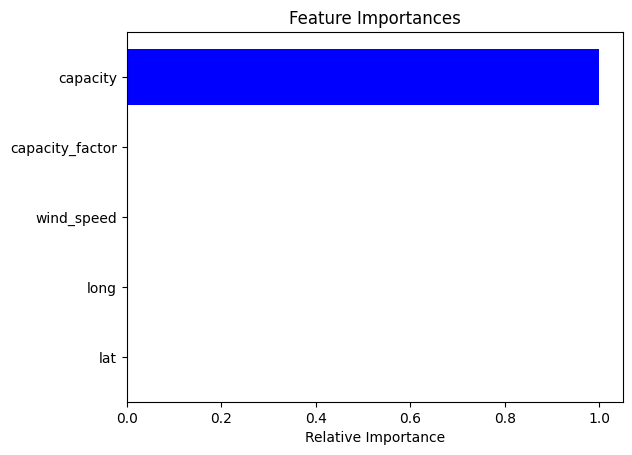

In [3]:
#| label: fig-feature-importances-old-wind
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()